# **Correlación cruzada con archivo de Vectrino Profiler ADV (Nortek)**
---
## *Subcoordinación de Posgrado y Educación Continua.*
### [Instituto Mexicano de Tecnología del Agua](https://www.gob.mx/imta).<br>

<img src="./Datos/Imagenes/Logos.png" style="height: 7em; vertical-align: middle;">

**Alumno: Ing. Omar Ulises Robles Pereyra** <br>
**Tutor: Dr. Ariosto Aguilar Chávez** <br>

[![Open In Colab](Datos/Imagenes/colab-badge.svg)](https://colab.research.google.com/github/OmarURP/Toolbox_publica/blob/master/01_CorrelacionCruzada.ipynb)

---

In [1]:
import ImtaTURB as imta

In [2]:
# Carga de archivos de datos #1
file1 = r'Datos/Vectrino/20_cm/C_1.mat'
U1, tiempo1, parametros = imta.cargar_vectrino(file1)
# Carga de archivos de datos #2
file2 = r'Datos/Vectrino/20_cm/D_1.mat'
U2, tiempo2, parametros = imta.cargar_vectrino(file2)

Datos cargados
Archivo: Datos/Vectrino/20_cm/C_1.mat

Componentes de velocidad [u_i]:
  u1: (36001, 10)
  u2: (36001, 10)
  u3: (36001, 10)
  u4: (36001, 10)

Tiempo= (36001,)
  Duración = 360.00 s
  dt = 0.0100 s

Parámetros de configuración de equipo:
  Frecuencia de muestreo: 100.00 Hz
  Velocidad del sonido: 1487.50 m/s
Datos cargados
Archivo: Datos/Vectrino/20_cm/D_1.mat

Componentes de velocidad [u_i]:
  u1: (36001, 10)
  u2: (36001, 10)
  u3: (36001, 10)
  u4: (36001, 10)

Tiempo= (36001,)
  Duración = 360.00 s
  dt = 0.0100 s

Parámetros de configuración de equipo:
  Frecuencia de muestreo: 100.00 Hz
  Velocidad del sonido: 1487.50 m/s


In [3]:
# Seleccion de celda
celda1 = 4 # 0 es celda (50), 9 es celda (59)
celda2 = 4
# Componentes de velocidad para el archivo 1
u1_file1 = U1['u1'][1:36000, celda1] # Longitudinal
u2_file1 = U1['u2'][1:36000, celda1] # Transversal
u3_file1 = U1['u3'][1:36000, celda1] # Tirante
# Componentes de velocidad para el archivo 2
u1_file2 = U2['u1'][1:36000, celda2]
u2_file2 = U2['u2'][1:36000, celda2]
u3_file2 = U2['u3'][1:36000, celda2]

tiempo1 = tiempo1[1:36000]
tiempo2 = tiempo2[1:36000]


In [4]:
# Velocidades fluctuantes para el archivo 1
u1_fluc_file1, fig = imta.fluctuante(u1_file1, tiempo=tiempo1, plot=False, titulo='Velocidad u1')
u2_fluc_file1, fig = imta.fluctuante(u2_file1, tiempo=tiempo1, plot=False, titulo='Velocidad u2')
u3_fluc_file1, fig = imta.fluctuante(u3_file1, tiempo=tiempo1, plot=False, titulo='Velocidad u3')
# Velocidades fluctuantes para el archivo 2
u1_fluc_file2, fig = imta.fluctuante(u1_file2, tiempo=tiempo2, plot=False, titulo='Velocidad u1')
u2_fluc_file2, fig = imta.fluctuante(u2_file2, tiempo=tiempo2, plot=False, titulo='Velocidad u2')
u3_fluc_file2, fig = imta.fluctuante(u3_file2, tiempo=tiempo2, plot=False, titulo='Velocidad u3')

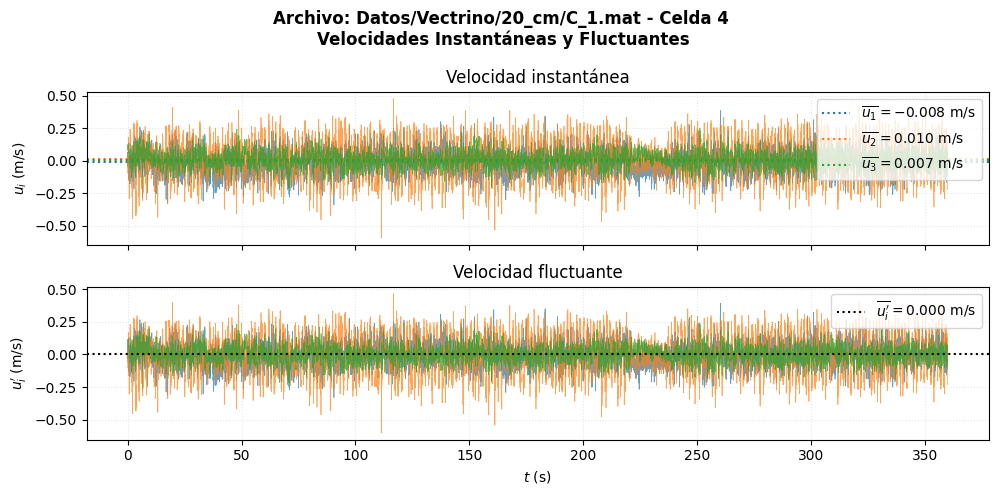

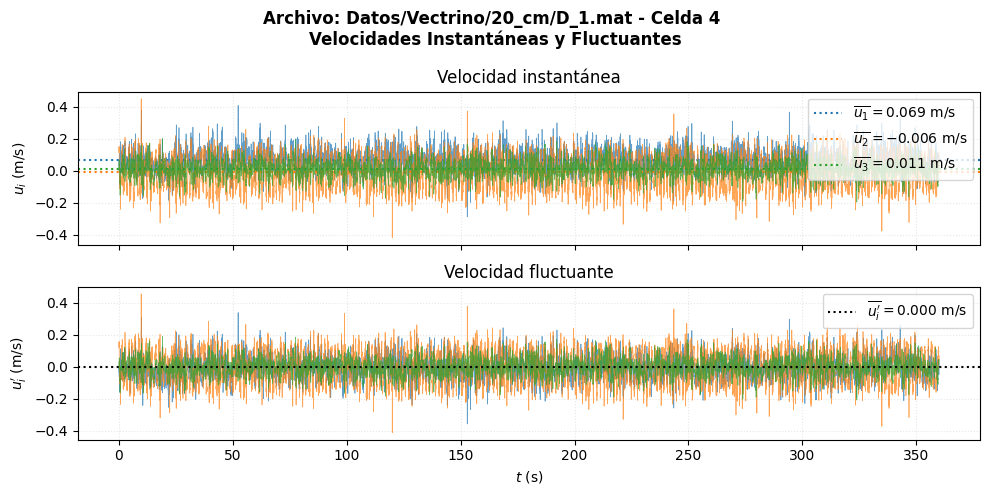

In [5]:
imta.plot_ui(tiempo1, u1_fluc_file1, u2_fluc_file1, u3_fluc_file1,
            titulo=f'Archivo: {file1} - Celda {celda1} \nVelocidades Instantáneas y Fluctuantes',
            etiquetas=('u_1', 'u_2', 'u_3'));

imta.plot_ui(tiempo2, u1_fluc_file2, u2_fluc_file2, u3_fluc_file2,
            titulo=f'Archivo: {file2} - Celda {celda2} \nVelocidades Instantáneas y Fluctuantes',
            etiquetas=('u_1', 'u_2', 'u_3'));

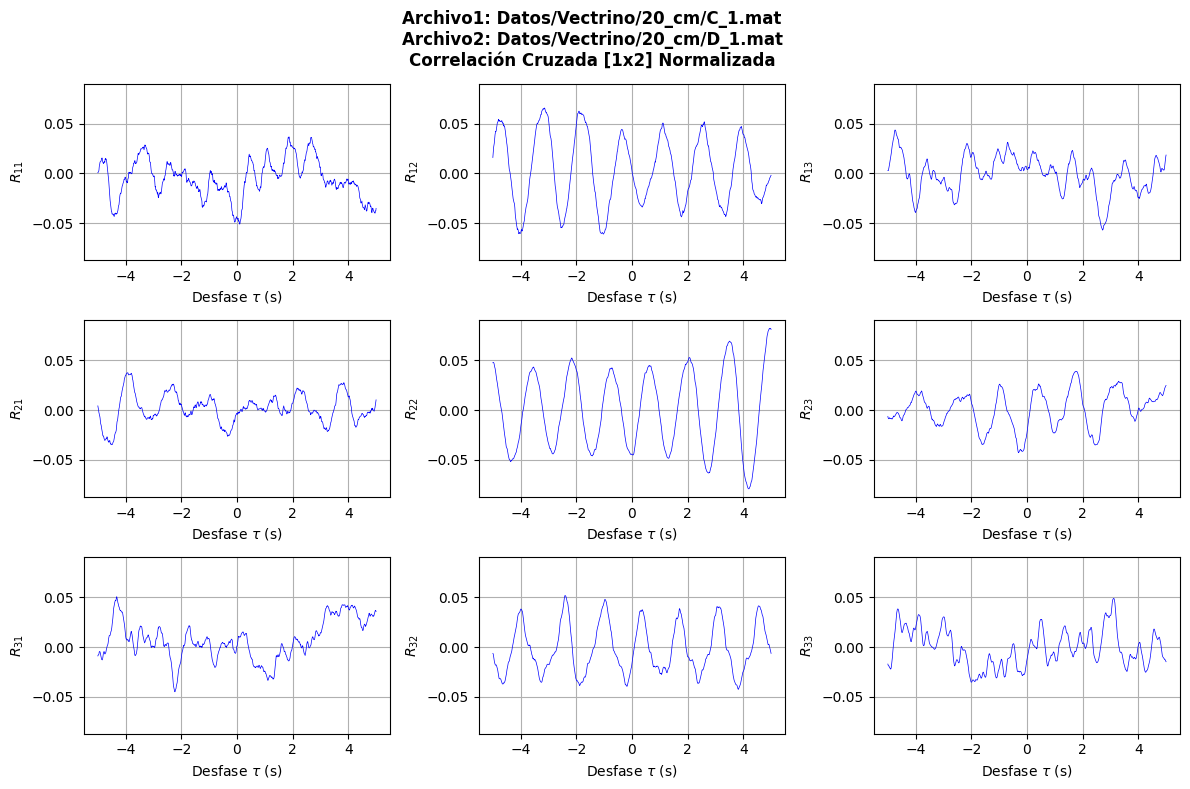

In [6]:
frecuencia = parametros['frec'].item()  # Valor de frecuencia de muestreo (Hz)
tensor_r, lags_s, fig = imta.correlacion_cruzada_norm(u1_fluc_file1['fluc'], u1_fluc_file2['fluc'],
                             u2_fluc_file1['fluc'], u2_fluc_file2['fluc'],
                             u3_fluc_file1['fluc'], u3_fluc_file2['fluc'],
                             frecuencia,
                             titulo=f'Archivo1: {file1} \nArchivo2: {file2} \nCorrelación Cruzada [1x2] Normalizada ',
                             max_lag_seg=5);

Valor máximo de correlación: 0.045
Posición del valor máximo: 0.64


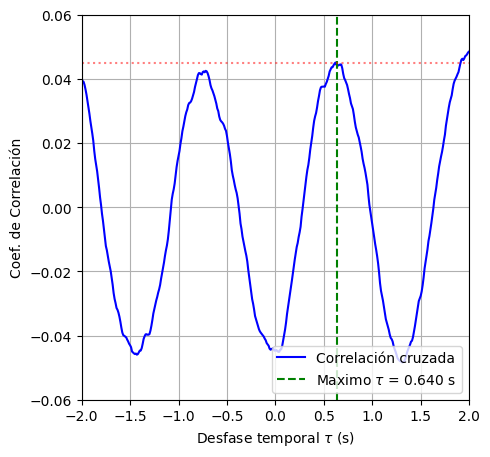

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#plt.plot(tensor_r['r22'])
R_p = tensor_r['r22']
max_corr_x = np.argmax(np.abs(R_p))
tau_max = 0.64 #lags_s[max_corr_x]
max_corr_val = 0.045 #R_p[max_corr_x]
print(f"Valor máximo de correlación: {max_corr_val}")
print(f"Posición del valor máximo: {tau_max}")
# Visualización de resultados
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(lags_s, R_p, 'b-', label='Correlación cruzada')
ax.axvline(x=tau_max, color='g', linestyle='--', label=f'Maximo $\\tau$ = {tau_max:.3f} s')
ax.axhline(y=max_corr_val, color='r', linestyle=':', alpha=0.5)
ax.set_ylabel('Coef. de Correlación')
ax.set_xlabel('Desfase temporal $\\tau$ (s)')
ax.grid(True)
ax.legend(loc='lower right')
ax.set_xlim(-2, 2)
ax.set_ylim(-0.06, 0.06)
# Cambiar fondo a transparente de la figura y blanco en los ejes
fig.patch.set_facecolor('none')
ax.set_facecolor('white')

Componente r11: Frecuencia máxima = 0.038 Hz, Energía = 3.121e+04
Componente r12: Frecuencia máxima = 0.688 Hz, Energía = 1.947e+05
Componente r13: Frecuencia máxima = 0.036 Hz, Energía = 2.374e+04
Componente r21: Frecuencia máxima = 0.700 Hz, Energía = 3.992e+04
Componente r22: Frecuencia máxima = 0.689 Hz, Energía = 8.138e+05
Componente r23: Frecuencia máxima = 0.704 Hz, Energía = 5.347e+04
Componente r31: Frecuencia máxima = 0.024 Hz, Energía = 2.722e+04
Componente r32: Frecuencia máxima = 0.689 Hz, Energía = 6.299e+04
Componente r33: Frecuencia máxima = 0.036 Hz, Energía = 2.362e+04


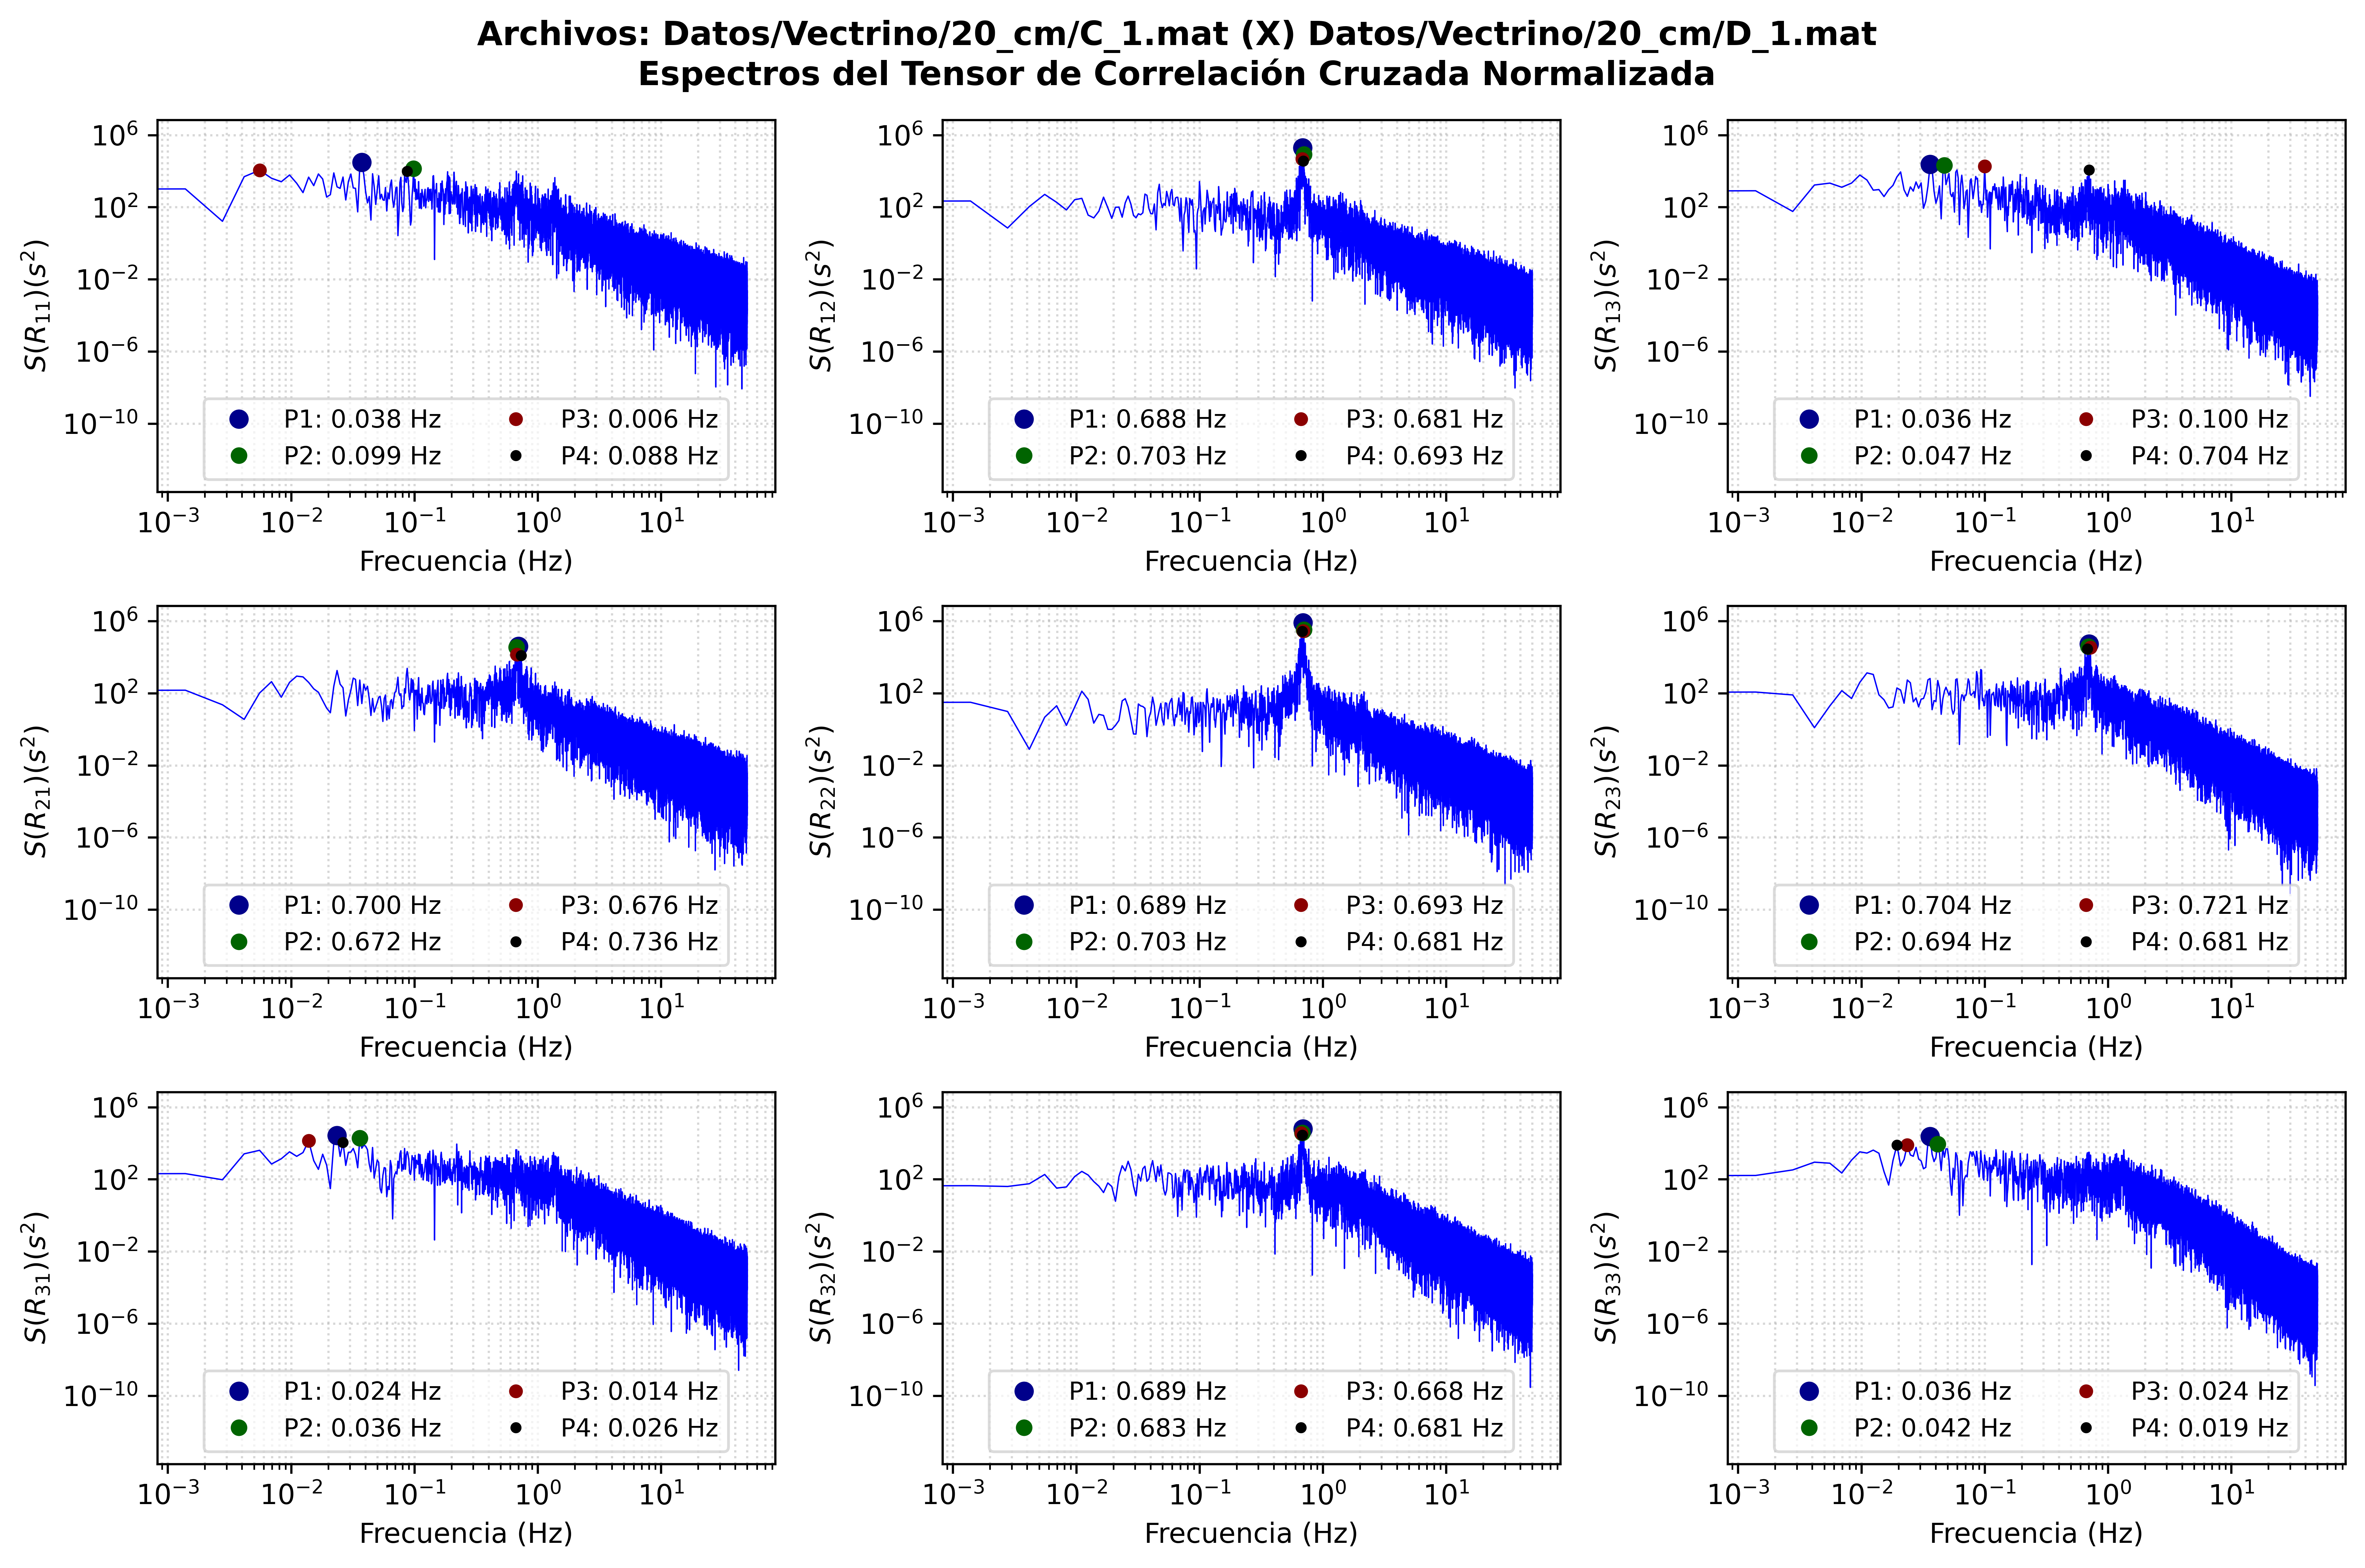

In [8]:
frecuencias, espectro, fig = imta.espectros_tensor(tensor_r,
                                                   frecuencia,
                                                   titulo=f'Archivos: {file1} (X) {file2} \nEspectros del Tensor de Correlación Cruzada Normalizada ',
                                                   plot=True)

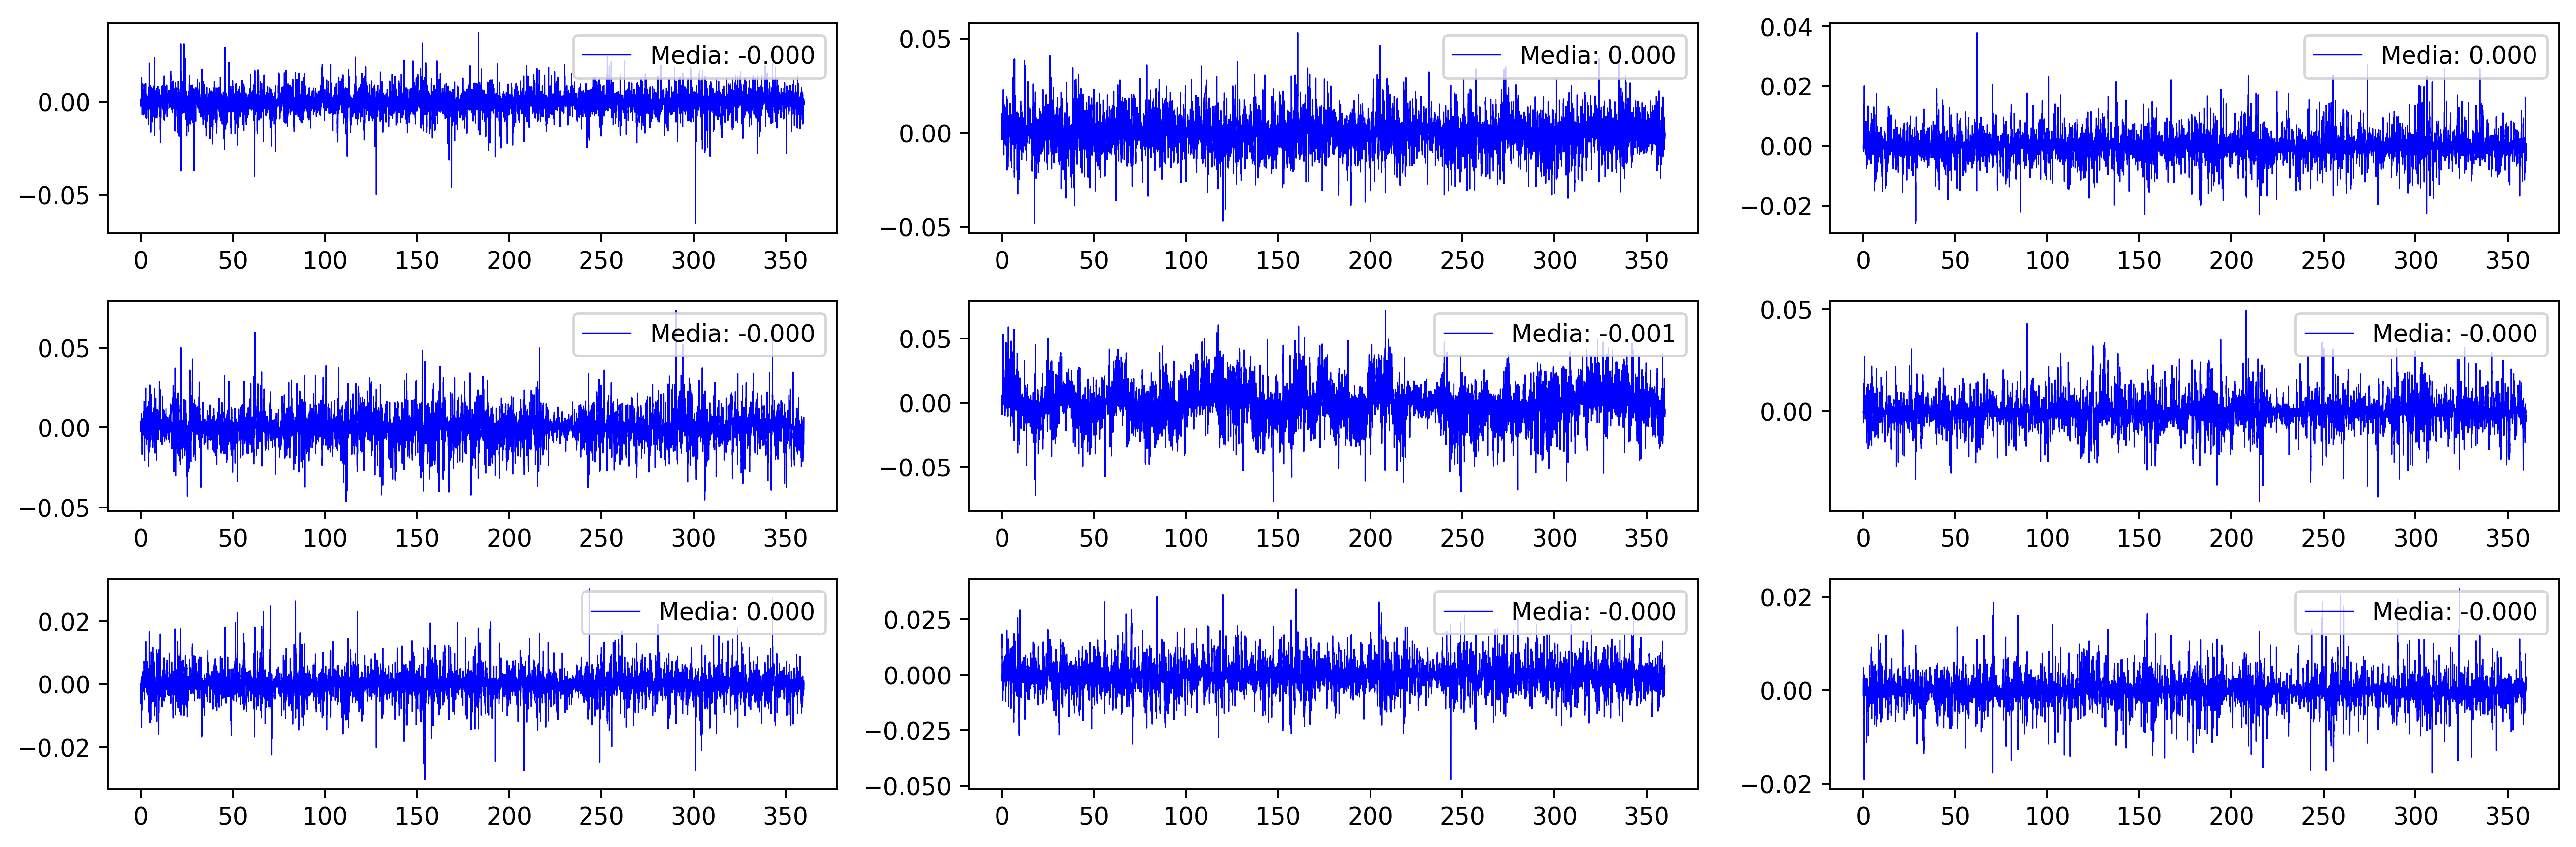

In [9]:
tiempo_file1 = tiempo1
import matplotlib.pyplot as plt
# Imprimiendo el tensor de esfuerzos de Reynolds
u1u1 = u1_fluc_file1['fluc'] * u1_fluc_file2['fluc']
u1u2 = u1_fluc_file1['fluc'] * u2_fluc_file2['fluc']
u1u3 = u1_fluc_file1['fluc'] * u3_fluc_file2['fluc']
u2u1 = u2_fluc_file1['fluc'] * u1_fluc_file2['fluc']
u2u2 = u2_fluc_file1['fluc'] * u2_fluc_file2['fluc']
u2u3 = u2_fluc_file1['fluc'] * u3_fluc_file2['fluc']
u3u1 = u3_fluc_file1['fluc'] * u1_fluc_file2['fluc']
u3u2 = u3_fluc_file1['fluc'] * u2_fluc_file2['fluc']
u3u3 = u3_fluc_file1['fluc'] * u3_fluc_file2['fluc']
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(15, 5), dpi=350)
gs = gridspec.GridSpec(3, 3)  # 6 filas, 2 columnas
ax1 = fig.add_subplot(gs[0, 0]) # 11
ax2 = fig.add_subplot(gs[0, 1]) # 12
ax3 = fig.add_subplot(gs[0, 2]) # 13
ax4 = fig.add_subplot(gs[1, 0]) # 21
ax5 = fig.add_subplot(gs[1, 1]) # 22
ax6 = fig.add_subplot(gs[1, 2]) # 23
ax7 = fig.add_subplot(gs[2, 0]) # 31
ax8 = fig.add_subplot(gs[2, 1]) # 32
ax9 = fig.add_subplot(gs[2, 2]) # 33
lw = 0.5
ax1.plot(tiempo_file1, u1u1, color='b', linewidth=lw, label=f'Media: {u1u1.mean():.3f}')
ax1.legend(loc='upper right')
ax2.plot(tiempo_file1, u1u2, color='b', linewidth=lw, label=f'Media: {u1u2.mean():.3f}')
ax2.legend(loc='upper right')
ax3.plot(tiempo_file1, u1u3, color='b', linewidth=lw, label=f'Media: {u1u3.mean():.3f}')
ax3.legend(loc='upper right')
ax4.plot(tiempo_file1, u2u1, color='b', linewidth=lw, label=f'Media: {u2u1.mean():.3f}')
ax4.legend(loc='upper right')
ax5.plot(tiempo_file1, u2u2, color='b', linewidth=lw, label=f'Media: {u2u2.mean():.3f}')
ax5.legend(loc='upper right')
ax6.plot(tiempo_file1, u2u3, color='b', linewidth=lw, label=f'Media: {u2u3.mean():.3f}')
ax6.legend(loc='upper right')
ax7.plot(tiempo_file1, u3u1, color='b', linewidth=lw, label=f'Media: {u3u1.mean():.3f}')
ax7.legend(loc='upper right')
ax8.plot(tiempo_file1, u3u2, color='b', linewidth=lw, label=f'Media: {u3u2.mean():.3f}')
ax8.legend(loc='upper right')
ax9.plot(tiempo_file1, u3u3, color='b', linewidth=lw, label=f'Media: {u3u3.mean():.3f}')
ax9.legend(loc='upper right')

plt.tight_layout()